Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [3]:
# loading the csv data to a Pandas DataFrame
brain_data = pd.read_csv('brains_Stroke_final.csv')

In [4]:
# print first 5 rows of the dataset
brain_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,0,80.0,0,1,0,0,1,105.92,32.5,1,1
2,1,49.0,0,0,0,0,0,171.23,34.4,2,1
3,1,79.0,1,0,0,1,1,174.12,24.0,1,1
4,0,81.0,0,0,0,0,0,186.21,29.0,0,1


In [5]:
# print last 5 rows of the dataset
brain_data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,0,41.0,0,0,1,0,1,70.15,29.8,0,0
4977,0,40.0,0,0,0,0,0,191.15,31.1,2,0
4978,1,45.0,1,0,0,2,1,95.02,31.8,2,0
4979,0,40.0,0,0,0,0,1,83.94,30.0,2,0
4980,1,80.0,1,0,0,0,0,83.75,29.1,1,0


In [6]:
# number of rows and columns in the dataset
brain_data.shape

(4981, 11)

In [7]:
# getting some info about the data
brain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


In [8]:
# checking for missing values
brain_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
# statistical measures about the data
brain_data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.583618,43.419859,0.096165,0.055210,0.341498,0.825336,0.491668,105.943562,28.498173,1.584019,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,1.101664,0.499981,45.075373,6.790464,1.092516,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.230000,23.700000,1.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.850000,28.100000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,3.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


<Axes: xlabel='row_0'>

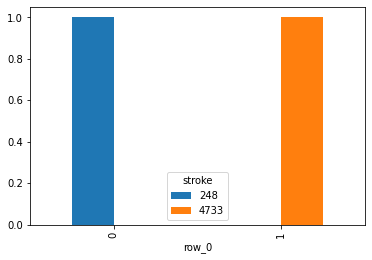

In [19]:
# checking the distribution of Target Variable
brain_data['stroke'].value_counts()
import matplotlib.pyplot as plt
pd.crosstab(brain_data['stroke'].unique(),brain_data['stroke'].value_counts()).plot(kind="bar")

1 --> Defective Brain

0 --> Healthy Brain

Splitting the Features and Target

In [24]:
X = brain_data.drop(columns='stroke', axis=1)
print(brain_data.groupby('stroke').mean())
Y = brain_data['stroke']

          gender        age  hypertension  heart_disease  ever_married  \
stroke                                                                   
0       0.584619  42.141348      0.087260       0.048172      0.353264   
1       0.564516  67.819839      0.266129       0.189516      0.116935   

        work_type  Residence_type  avg_glucose_level        bmi  \
stroke                                                            
0        0.839637        0.493556         104.569056  28.409698   
1        0.552419        0.455645         132.175565  30.186694   

        smoking_status  
stroke                  
0             1.600676  
1             1.266129  


In [ ]:
print(X)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.0             0              1             0          0   
1          0  80.0             0              1             0          0   
2          1  49.0             0              0             0          0   
3          1  79.0             1              0             0          1   
4          0  81.0             0              0             0          0   
...      ...   ...           ...            ...           ...        ...   
4976       0  41.0             0              0             1          0   
4977       0  40.0             0              0             0          0   
4978       1  45.0             1              0             0          2   
4979       0  40.0             0              0             0          0   
4980       1  80.0             1              0             0          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  0   

In [ ]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(4981, 10) (3984, 10) (997, 10)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(4981,) (3984,) (997,)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9490461847389559


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9498495486459378


Building a Predictive System

In [ ]:
input_data = (293,1,49,0,0,0,0,1,138.16,19.4)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Brain Stoke')
else:
  print('The Person has Brain Stoke')

[1]
The Person has Brain Stoke


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
